## 🛍️ Customer Segmentation Analysis – Overview & Purpose
## 📦 Dataset Description
## Source: Kaggle – Customer Segmentation

Rows: ~200 entries

### Columns:

Customer ID: Unique identifier

Gender: Male/Female

Age: Customer age

Annual Income: Yearly income (k$)

Spending Score: Score (1–100) assigned based on spending habits and behavior

## 🎯 Overall Objective
To explore customer behaviors using data analysis and visualizations, then apply clustering (K-Means) to discover meaningful customer segments. These insights help businesses make data-driven marketing and sales decisions.

#### 1: Who Are Our Big Spenders?
#### Goal: Identify customers who spend the most.

#### How: Look at customers with high spending scores and high annual income.

#### Insight:

#### These are your premium customers. You can target them for loyalty programs or premium offers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
df = pd.read_csv("C:\\Users\\Admin\\OneDrive\\Desktop\\Mall_Customers.csv")  # replace with actual path

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
((df.isnull().sum())/len(df) )*100

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

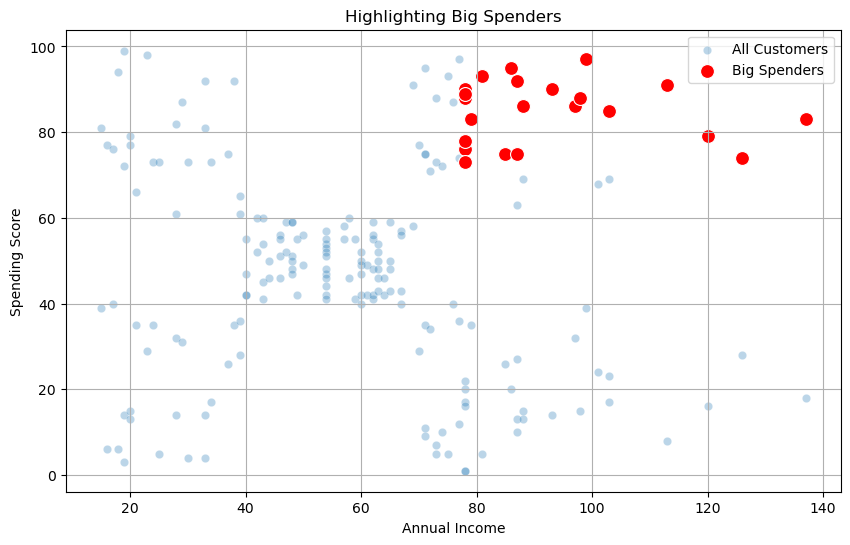

Top Big Spenders:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
185         186    Male   30                  99                      97
167         168  Female   33                  86                      95
163         164  Female   31                  81                      93
173         174    Male   36                  87                      92
193         194  Female   38                 113                      91
179         180    Male   35                  93                      90
149         150    Male   34                  78                      90
155         156  Female   27                  78                      89
151         152    Male   39                  78                      88
183         184  Female   29                  98                      88
175         176  Female   30                  88                      86
181         182  Female   32                  97                      86
189         190  Female   36     

In [5]:

# Step 2: Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', alpha=0.3, label='All Customers')
sns.scatterplot(data=big_spenders, x='Annual Income (k$)', y='Spending Score (1-100)', color='red', label='Big Spenders', s=100)
plt.title('Highlighting Big Spenders')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()


# Step 3: Define big spenders (e.g., top 25% of income and top 25% of spending score)
income_threshold = df['Annual Income (k$)'].quantile(0.75)
spending_threshold = df['Spending Score (1-100)'].quantile(0.75)

big_spenders = df[(df['Annual Income (k$)'] >= income_threshold) & (df['Spending Score (1-100)'] >= spending_threshold)]

# Step 4: View the top big spenders
print("Top Big Spenders:")
print(big_spenders.sort_values(by='Spending Score (1-100)', ascending=False))


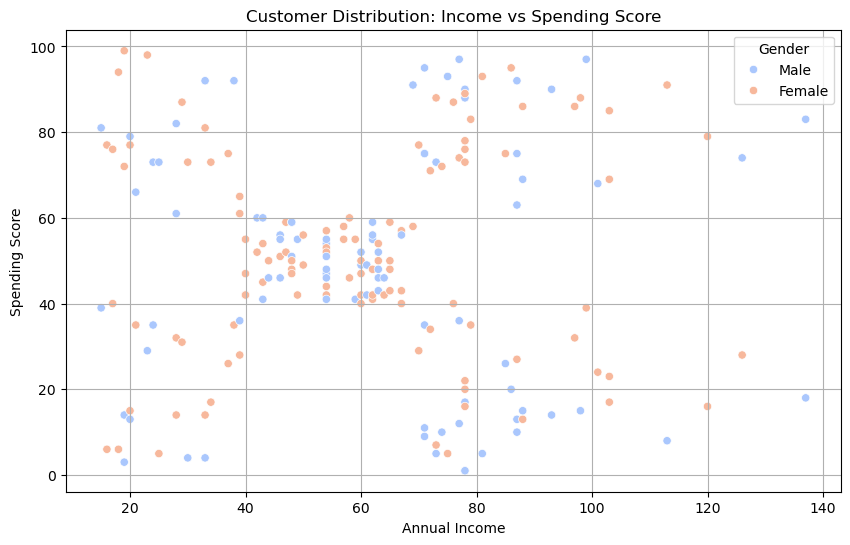

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='coolwarm')
plt.title('Customer Distribution: Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()

## Identification of High-Value Customers (Based on Definition):
The code successfully identifies a subset of customers (labeled "Big Spenders" in red on the plot and listed in the dataframe) who fall within the top 25% of the dataset for both 'Annual Income (k$)' and 'Spending Score (1-100)'.

## Visual Distinction of Big Spenders:
The scatter plot visually separates these "Big Spenders" from the rest of the customer base, allowing for a quick understanding of their position within the income-spending landscape.

## Confirmation of the Definition's Impact: 
The red dots on the scatter plot show the location of customers who meet your specific criteria for being a "Big Spender." Their positioning confirms how your chosen thresholds for income and spending score define this segment.

## Ranking of Top Big Spenders: 
The printed "Top Big Spenders" dataframe, sorted by 'Spending Score' in descending order, provides a ranked list of the customers who meet your definition, with those having the highest spending scores among the high-income group appearing at the top.

## Potential for Targeted Analysis:
The Customer IDs of these big spenders are now known, allowing for further investigation into their individual purchase histories or engagement with the mall (if that data were available).

## Initial Understanding of the "Big Spender" Profile:
By looking at the 'Annual Income (k$)' and 'Spending Score (1-100)' values in the "Top Big Spenders" dataframe, you can get a sense of the range and typical values for these two key metrics within this high-value segment.

### 2: Are We Missing Out on High-Income Low Spenders?
Goal: Find people who earn a lot but have low spending scores.

How: Filter customers with high income but low spending score.

### Insight:

These could be potential customers who aren’t engaged enough. Why aren’t they spending? Consider targeting them with personalized marketing or incentives.

High-Income, Low-Spending Customers:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
148         149  Female   34                  78                      22
150         151    Male   43                  78                      17
152         153  Female   44                  78                      20
154         155  Female   47                  78                      16
156         157    Male   37                  78                       1
158         159    Male   34                  78                       1
162         163    Male   19                  81                       5
164         165    Male   50                  85                      26
166         167    Male   42                  86                      20
168         169  Female   36                  87                      27
170         171    Male   40                  87                      13
172         173    Male   36                  87                      10
174         17

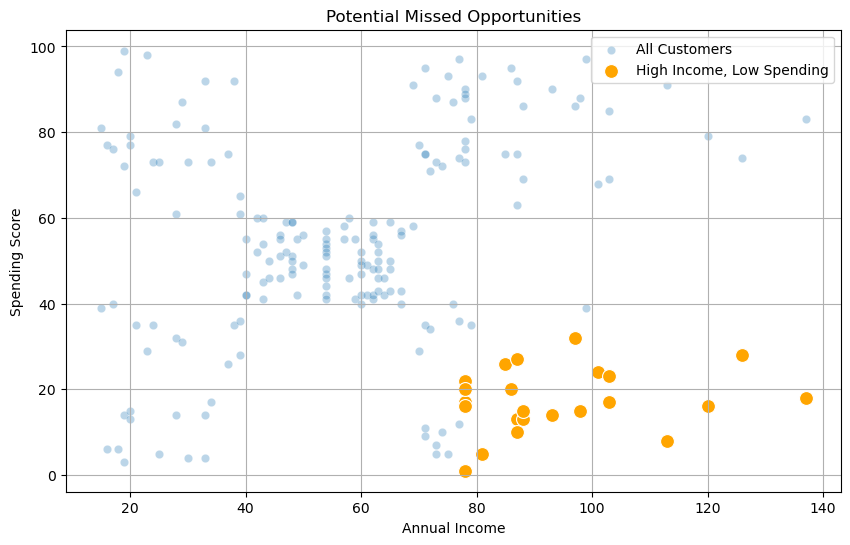

In [9]:

# If not already done
df.columns = df.columns.str.strip()

# Step 1: Define thresholds
high_income_threshold = df['Annual Income (k$)'].quantile(0.75)
low_spending_threshold = df['Spending Score (1-100)'].quantile(0.25)

# Step 2: Filter for high-income, low-spending customers
missed_opportunities = df[
    (df['Annual Income (k$)'] >= high_income_threshold) &
    (df['Spending Score (1-100)'] <= low_spending_threshold)
]

# Step 3: Display potential missed opportunities
print("High-Income, Low-Spending Customers:")
print(missed_opportunities)

# Step 4: Visualize them
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', alpha=0.3, label='All Customers')
sns.scatterplot(data=missed_opportunities, x='Annual Income (k$)', y='Spending Score (1-100)', color='orange', label='High Income, Low Spending', s=100)
plt.title('Potential Missed Opportunities')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()


## Insights from Identifying "Missed Opportunities":

### Identification of a Specific Customer Segment:
The code identifies a segment of customers who have a high annual income (in the top 25%) but a low spending score (in the bottom 25%). These are labeled as "High-Income, Low-Spending Customers."

Quantification of Missed Opportunities: 
The printed missed_opportunities dataframe shows the specific customers (by their attributes like Customer ID, Gender, Age, Annual Income, and Spending Score) that fall into this category. This allows you to know exactly how many such customers exist in your dataset.
Visual Highlighting of Potential:
The orange dots on the scatter plot visually emphasize these "missed opportunity" customers in relation to the entire customer base. They are clearly located in the higher income range but lower spending score range of the plot.
Strategic Implications: 
This visualization and list highlight potential "missed opportunities" for the mall. These high-income individuals are not spending much within the mall, suggesting a disconnect between their financial capacity and their spending habits there. This could indicate a need to understand their preferences, needs, or why they are not spending more.

## Insights from Analyzing Spending Score by Age Group:
### Categorization of Customers by Age:
The code successfully categorizes customers into defined age groups (16-25, 26-35, 36-45, 46-55, 56-65, 66-75).
Calculation of Average Spending per Age Group: The age_spending dataframe provides the average spending score for each of these defined age groups. This summarizes the general spending behavior across different age segments.

### Identification of Spending Patterns Across Age: 
The bar plot visually compares the average spending score across the different age groups. The height of each bar represents the average spending score for that particular age demographic.

### Potential Age-Related Spending Trends:
By observing the bar plot, you can identify which age groups tend to have higher or lower average spending scores. This can reveal potential age-related trends in spending behavior within the mall. For example, you might see that a particular age group has a significantly higher or lower average spending score compared to others. This information can be valuable for tailoring marketing efforts or understanding which age segments are most engaged with the mall's offerings.

### 3. Which Age Groups Spend the Most?
Goal: See which age brackets have the highest spending scores.

How: Group by age ranges and calculate average spending scores.

### Insight:

This helps you understand which age groups are your biggest shoppers. You can tailor products or ads accordingly.

C:\Users\Admin\AppData\Local\Temp\ipykernel_276\2805300176.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = df.groupby('Age Group')['Spending Score (1-100)'].mean().reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_276\2805300176.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_spending, x='Age Group', y='Spending Score (1-100)', palette='viridis')


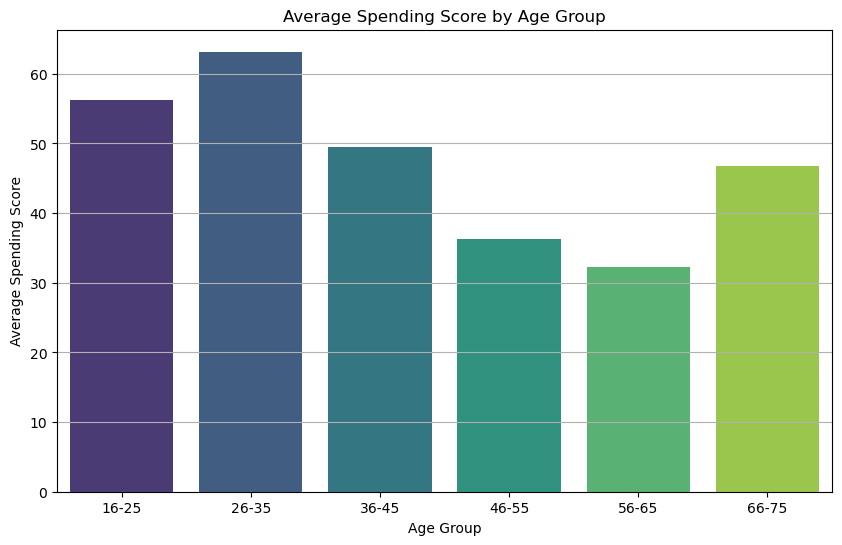

In [10]:

# Step 1: Create age bins
bins = [15, 25, 35, 45, 55, 65, 75]
labels = ['16-25', '26-35', '36-45', '46-55', '56-65', '66-75']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 2: Calculate average spending score by age group
age_spending = df.groupby('Age Group')['Spending Score (1-100)'].mean().reset_index()

# Step 3: Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=age_spending, x='Age Group', y='Spending Score (1-100)', palette='viridis')
plt.title('Average Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.grid(axis='y')
plt.show()


### Categorization of Customers by Age:
The code successfully divides the customer data into distinct age groups: 16-25, 26-35, 36-45, 46-55, 56-65, and 66-75.

### Calculation of Average Spending per Age Segment:
The age_spending DataFrame presents the average 'Spending Score' for each of these defined age groups. This provides a summary of the typical spending behavior within each age demographic.

### Visual Comparison of Spending Across Age Groups: 
The bar plot visually represents the average spending score for each age group. The height of each bar directly corresponds to the average spending score of the customers within that particular age range.

### Identification of Age-Related Spending Tendencies:
By examining the bar plot, you can readily identify which age groups exhibit higher or lower average spending scores. This can reveal potential correlations between age and spending behavior within the mall. For instance, you might observe that a specific age group tends to have a significantly higher or lower average spending score compared to others. This information can be valuable for tailoring marketing strategies, understanding target demographics, and identifying potential areas for engagement across different age segments.

### 4. Gender-Based Spending Habits
Goal: Analyze how spending varies by gender.

How: Compare average spending scores and incomes between genders.

### Insight:

If one gender is significantly higher in spending or visits, you can design targeted offers for the other to balance out engagement.

C:\Users\Admin\AppData\Local\Temp\ipykernel_276\479194679.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_spending, x='Gender', y='Spending Score (1-100)', palette='pastel')


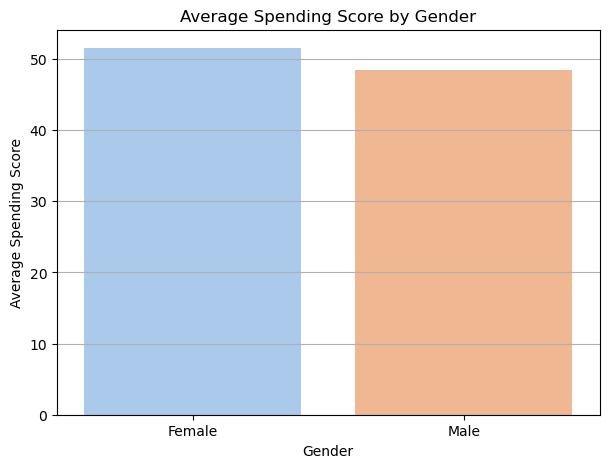

C:\Users\Admin\AppData\Local\Temp\ipykernel_276\479194679.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='Set2')


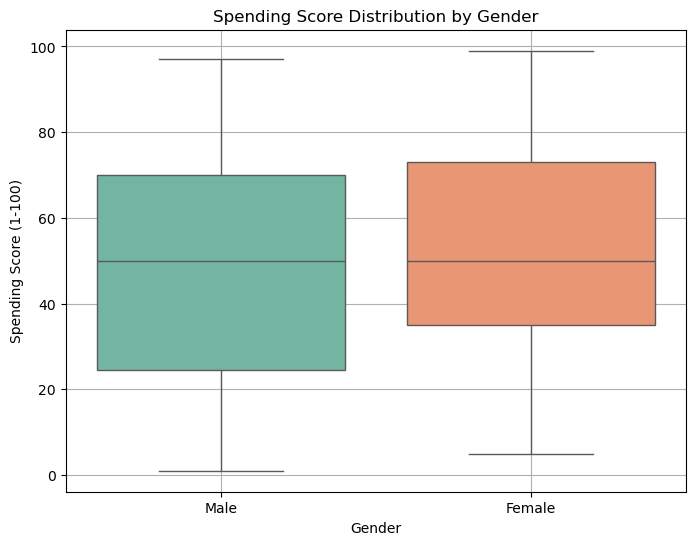

In [13]:

# Step 1: Group by Gender and get average Spending Score
gender_spending = df.groupby('Gender')['Spending Score (1-100)'].mean().reset_index()

# Step 2: Bar Plot
plt.figure(figsize=(7, 5))
sns.barplot(data=gender_spending, x='Gender', y='Spending Score (1-100)', palette='pastel')
plt.title('Average Spending Score by Gender')
plt.ylabel('Average Spending Score')
plt.xlabel('Gender')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='Set2')
plt.title('Spending Score Distribution by Gender')
plt.grid(True)
plt.show()



## Insights from the Bar Plot of Average Spending Score by Gender:

### Comparison of Average Spending:
The bar plot visually compares the average spending score between the two gender categories (Male and Female) present in your dataset. The height of each bar represents the average spending score for that gender.

### Identification of Potential Gender-Based Spending Differences: 
By observing the heights of the bars, you can determine if there is a noticeable difference in the average spending score between male and female customers. One gender might exhibit a higher average spending score than the other.

### Overall Spending Tendencies by Gender:
This visualization provides a high-level overview of the general spending behavior of male versus female customers based on the 'Spending Score' assigned by the mall.

## Insights from the Box Plot of Spending Score Distribution by Gender:

### Distribution of Spending Within Each Gender:
The box plot provides a more detailed view of how the 'Spending Score' is distributed within each gender group. It shows the median (the line inside the box), the quartiles (the edges of the box), and potential outliers (the points outside the whiskers).

### Comparison of Median Spending: 
You can compare the median spending scores (the lines inside the boxes) between males and females. This gives you a sense of the typical spending score for each gender.

### Spread and Variability of Spending:
The length of the boxes (the interquartile range) indicates the spread or variability of spending scores within each gender group. A longer box suggests a wider range of spending scores.

### Identification of Potential Outliers:
The individual points outside the whiskers represent potential outliers in spending score for each gender. These are customers with unusually high or low spending scores compared to the majority within their gender group.

### Overall Spending Patterns by Gender:
By comparing the position and spread of the boxes, you can gain a deeper understanding of the overall spending patterns and consistency within the male and female customer segments. For example, one gender might have a higher median spending score but also a wider range of spending habits.

### 5. Cluster-Based Segmentation (K-Means)
Goal: Group customers into distinct segments based on income and spending.

How: Use K-means clustering on Annual Income and Spending Score.

### Insight:

Helps you define marketing personas like:

High Income, High Spending → Premium segment

Low Income, High Spending → Loyal budget shoppers

High Income, Low Spending → Opportunity for engagement

Low Income, Low Spending → Least priority group

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

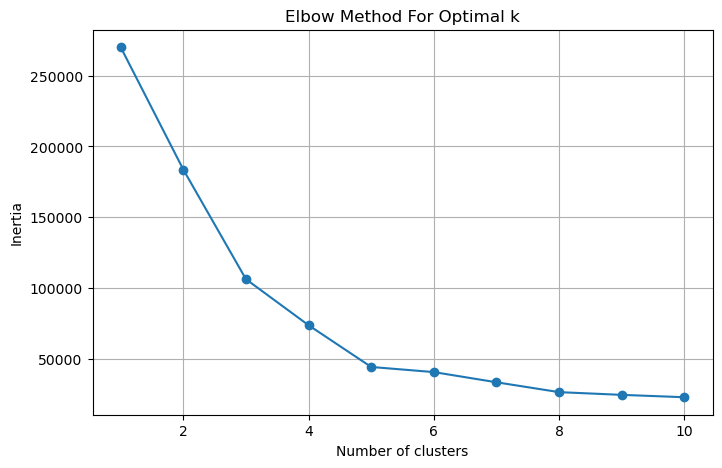

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


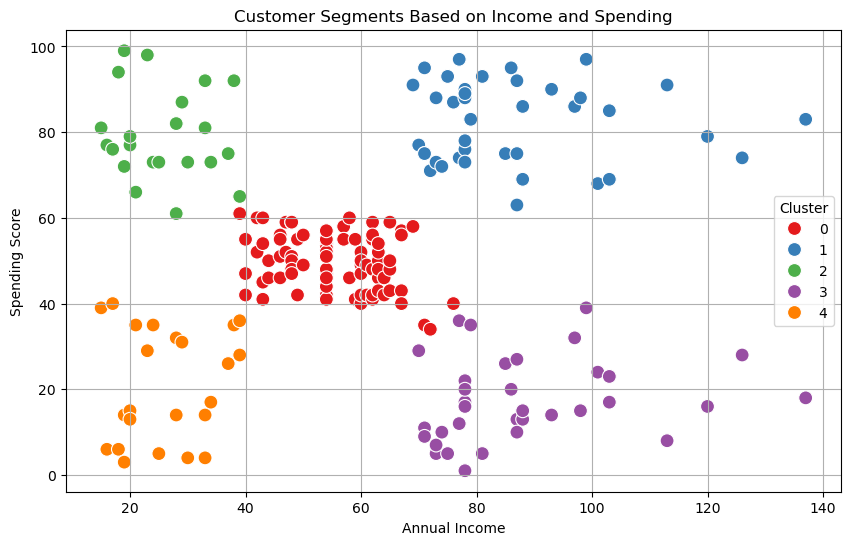

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [15]:
from sklearn.cluster import KMeans

# Step 1: Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 2: Find optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Let’s assume k=5 based on the elbow plot
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segments Based on Income and Spending')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())


## Insights from the Elbow Method Plot:

### Visual Aid for Determining Optimal Clusters:
The plot displays the inertia (within-cluster sum of squares) for different numbers of clusters (k) ranging from 1 to 10. The goal of the Elbow Method is to identify the "elbow" point in the graph.

### Identifying a Potential "Elbow": 
The point where the rate of decrease in inertia starts to slow down significantly suggests a potentially optimal number of clusters. This is because adding more clusters beyond this point doesn't substantially reduce the within-cluster variance.

### Subjectivity of the Elbow:
It's important to note that identifying the "elbow" can sometimes be subjective. There might not always be a clearly defined bend in the curve. In your case, assuming you visually identified k=5 as the elbow, it suggests that grouping your customers into 5 clusters might be a reasonable approach to capture distinct segments based on their annual income and spending score.

## Insights from Applying K-Means Clustering (assuming k=5):

### Customer Segmentation: 
The code successfully applies the K-Means clustering algorithm to group your customers into 5 distinct clusters based on their 'Annual Income' and 'Spending Score'.

### Assignment of Cluster Labels:
A new column named 'Cluster' has been added to your DataFrame (df). Each customer now has an assigned cluster label (0, 1, 2, 3, or 4), indicating which of the 5 groups they belong to.

### Foundation for Further Analysis:
This clustering provides a basis for further analysis of each customer segment. You can now investigate the characteristics of the customers within each cluster, such as their average age, gender distribution, or any other relevant features in your dataset.

### Potential for Targeted Strategies:
Understanding these distinct customer segments can inform more targeted marketing campaigns, personalized product recommendations, or tailored customer service approaches for each group.

### In summary, this code allows you to:
Make an informed decision (based on the Elbow Method) about the number of meaningful customer segments based on their income and spending habits.
Automatically group your customers into those identified segments using the K-Means algorithm.
Create a new variable in your data that labels each customer with their assigned cluster, enabling further exploration and analysis of these distinct groups.

### 6. Income Distribution Across Segments
Goal: Understand how income varies across customer types.

How: Plot income histograms by cluster or segment.

### Insight:

Gives an idea of your customer base's financial capacity and helps set price points.

In [17]:
# Step 1: Summary statistics for each cluster
cluster_profile = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count',
}).rename(columns={'Customer ID': 'Customer Count'}).round(1)

print(cluster_profile)


          Age  Annual Income (k$)  Spending Score (1-100)  CustomerID
Cluster                                                              
0        42.7                55.3                    49.5          81
1        32.7                86.5                    82.1          39
2        25.3                25.7                    79.4          22
3        41.1                88.2                    17.1          35
4        45.2                26.3                    20.9          23


In [18]:
# Step 2: Gender distribution per cluster
gender_distribution = df.groupby(['Cluster', 'Gender']).size().unstack().fillna(0)
print(gender_distribution)


Gender   Female  Male
Cluster              
0            48    33
1            21    18
2            13     9
3            16    19
4            14     9


C:\Users\Admin\AppData\Local\Temp\ipykernel_276\3434238453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=feature, palette='Set2')


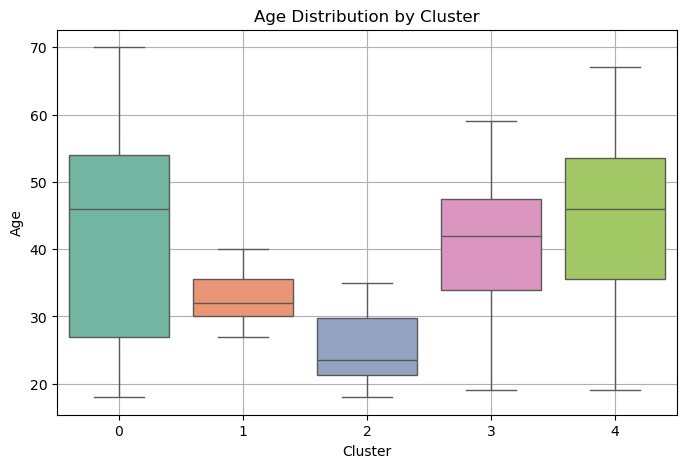

C:\Users\Admin\AppData\Local\Temp\ipykernel_276\3434238453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=feature, palette='Set2')


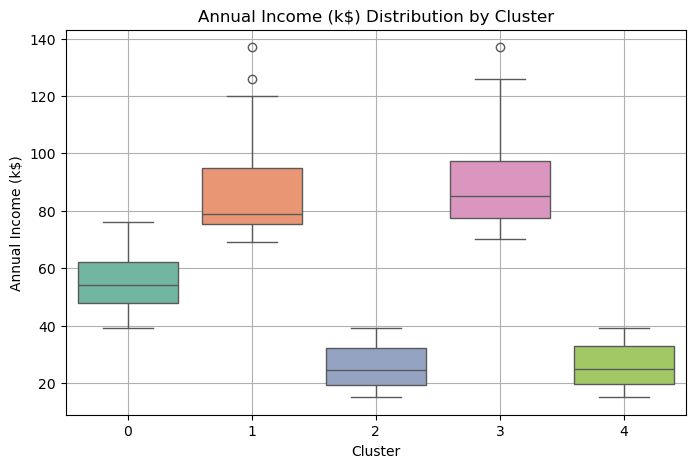

C:\Users\Admin\AppData\Local\Temp\ipykernel_276\3434238453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=feature, palette='Set2')


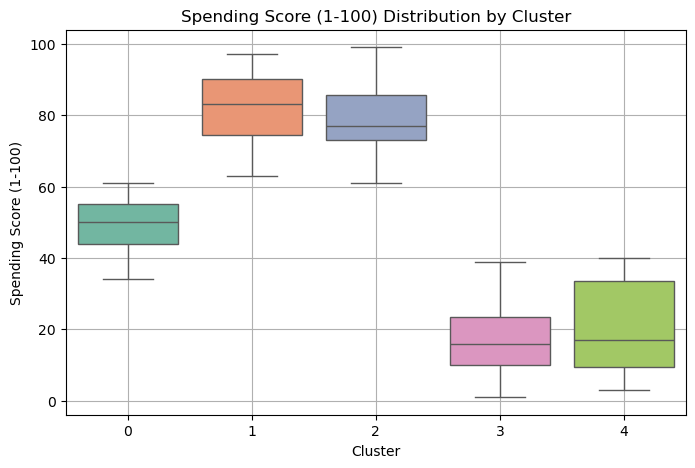

In [19]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Cluster', y=feature, palette='Set2')
    plt.title(f'{feature} Distribution by Cluster')
    plt.grid(True)
    plt.show()


## Insights from the Cluster Profiles:

### Distinct Cluster Characteristics:
The cluster_profile DataFrame provides a statistical summary for each of the 5 clusters you identified. You can see the average age, average annual income, and average spending score for the customers within each cluster. This allows you to start characterizing each segment. For example:
One cluster might have a high average income and a high average spending score.
                                                                                                                                                                                
    *Another cluster might have a lower average income but a high average spending score.
    *Yet another might have moderate income and moderate spending.
    
#### Cluster Size: 
The 'Customer Count' column tells you how many customers fall into each of the 5 clusters. This indicates the relative size and importance of each segment within your overall customer base. Some clusters might be significantly larger than others.

## Insights from Gender Distribution per Cluster:

### Gender Composition of Each Segment:
The gender_distribution DataFrame shows the number of male and female customers within each of the 5 clusters. This helps you understand the gender makeup of each identified segment.

### Potential Gender Skews:
You can observe if certain clusters are predominantly male or female, or if the gender distribution is relatively even across all clusters. This information can be valuable for tailoring marketing messages or product offerings to specific segments.

## Insights from the Box Plots of Feature Distribution by Cluster (Age, Annual Income, Spending Score):

### Distribution of Features Within Clusters:
The box plots provide a visual representation of the distribution of 'Age', 'Annual Income', and 'Spending Score' within each of the 5 clusters. This gives you a more detailed understanding than just the average.

### Central Tendency and Spread: 
For each feature and each cluster, you can see the median (the line inside the box), the quartiles (the edges of the box), and the spread (the length of the box). This helps you understand the typical values and the variability of these features within each segment.

### Cluster Differentiation:
By comparing the box plots across the different clusters for each feature, you can visually assess how well the clusters are separated based on these characteristics. For example, the box plots for 'Annual Income' might show clear differences in the income levels of the different clusters.

### Identification of Potential Outliers:
The points outside the whiskers in the box plots represent potential outliers for each feature within each cluster. These are customers with unusually high or low values for that specific characteristic compared to the rest of their cluster.

### In summary, this code provides a deeper understanding of the customer segments identified by the K-Means algorithm by:
Describing each cluster in terms of the average age, income, and spending score of its members, as well as the size of each cluster.
Revealing the gender breakdown within each cluster.
Visually illustrating the distribution of key features (Age, Income, Spending Score) within each cluster, allowing for a more nuanced understanding of the characteristics of each segment and how they differ from one another.

### 7. Age vs Spending Patterns
Goal: See if there's a trend between age and spending.

How: Plot a line or scatter plot of Age vs Spending Score.

### Insight:

Younger customers might spend more impulsively, while older ones might be more calculated. Adjust marketing tone accordingly.

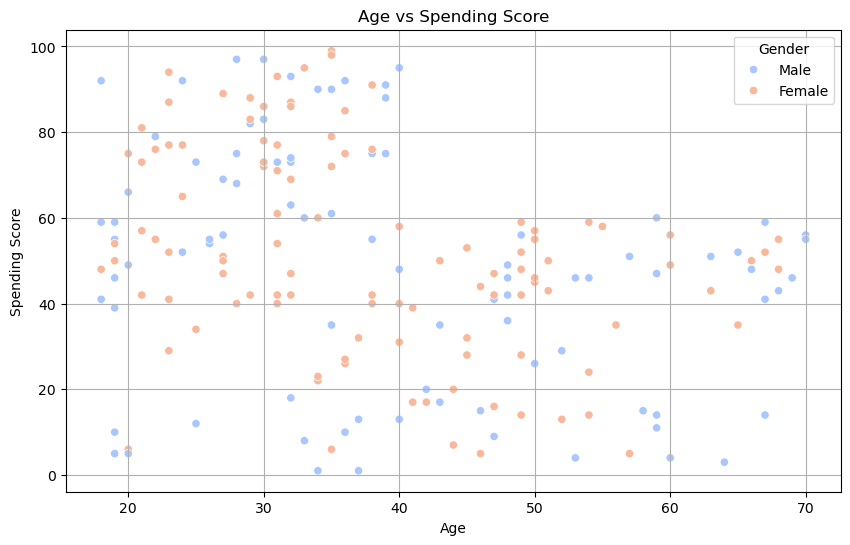

In [21]:

# Step 1: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender', palette='coolwarm')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()


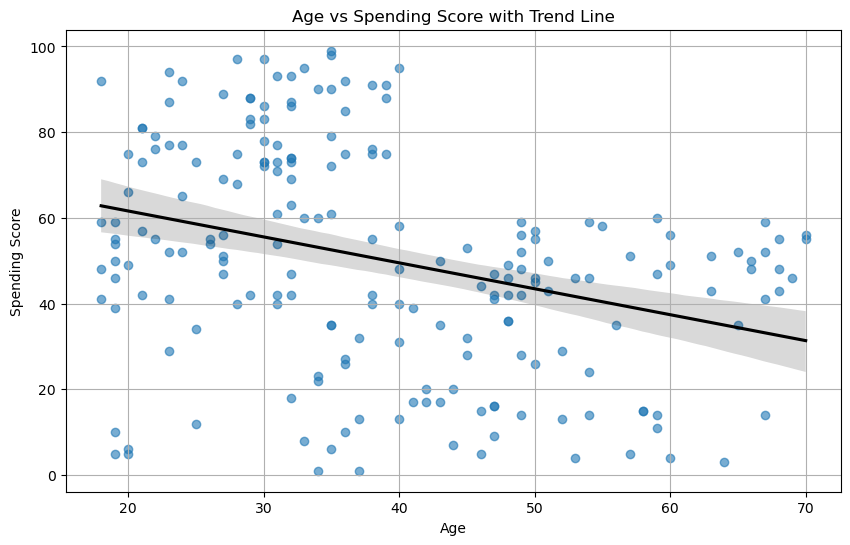

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age', y='Spending Score (1-100)', scatter_kws={'alpha':0.6}, line_kws={"color": "black"})
plt.title('Age vs Spending Score with Trend Line')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()


## Insights from the Scatter Plot of Age vs. Spending Score (Colored by Gender):

### Relationship between Age and Spending Score:
The scatter plot visualizes the relationship between a customer's age and their spending score. Each point represents a customer, and its position on the plot indicates their age and spending score.

### Influence of Gender:
By using the 'hue' parameter to color the points based on gender, you can observe if there are any apparent differences in the age-spending patterns between male and female customers. You might see clusters of one gender in specific regions of the plot, suggesting potential gender-based variations in spending behavior across different age groups.

### Identification of Clusters or Trends: 
You can visually look for any natural groupings or trends in the data points. For example, do younger customers tend to have higher spending scores? Is there a particular age range where spending scores are more varied? Are there distinct clusters of male or female customers with similar age and spending habits?

## Insights from the Scatter Plot with a Regression Line:

### Overall Trend: 
The regression line overlaid on the scatter plot provides a visual representation of the general trend between age and spending score across all customers, regardless of gender.

### Direction and Strength of the Relationship:
The slope of the regression line indicates the direction of the relationship. A positive slope would suggest that spending score tends to increase with age, while a negative slope would suggest the opposite. The tightness of the points around the line gives a sense of the strength of this linear relationship. A line that closely follows the points indicates a stronger linear correlation.

### Prediction (with Caution):
While the regression line can suggest a general trend, it's important to remember that it's a simplified model. It might not accurately predict the spending score of an individual customer based solely on their age, especially if the data points are widely scattered.

### No Gender Differentiation in Trend:
This plot shows the overall trend, but it doesn't differentiate between genders. To see if the relationship between age and spending score differs by gender, you would typically plot separate regression lines for males and females.

### In summary, this code helps you to:
Visualize the raw relationship between customer age and their spending score, allowing for the identification of potential patterns or groupings.
Explore whether gender plays a role in the age-spending dynamic by coloring the data points accordingly.
Understand the overall linear trend between age and spending score across all customers using a regression line.